## Practice with Binning and Aggregation

#### Imports

In [2]:
# Import altairs and cars dataset

import altair as alt
from vega_datasets import data

In [3]:
# Assign data to variable

cars = data.cars()
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

In [4]:
#### Review of Aggregation at high level

#Input -> Split -> Apply (sum) -> Combine back together

### Aggregation

In [5]:
# GROUPBY and Mean

cars.groupby('Origin')['Miles_per_Gallon'].mean()

Origin
Europe    27.891429
Japan     30.450633
USA       20.083534
Name: Miles_per_Gallon, dtype: float64

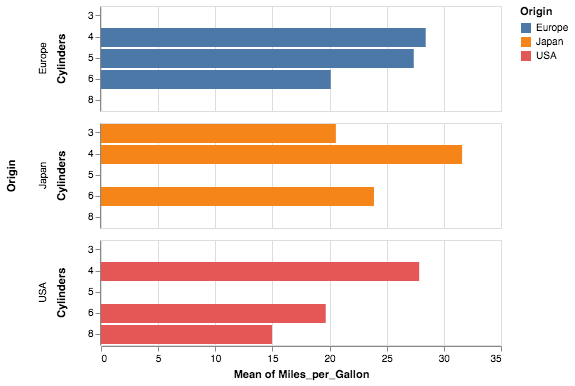

In [6]:
# Create stacked chart of aggregation

alt.Chart(cars).mark_bar().encode(
    y = 'Cylinders:O',
    row = 'Origin',
    color = 'Origin',
    x = 'mean(Miles_per_Gallon)'
)

### Binning

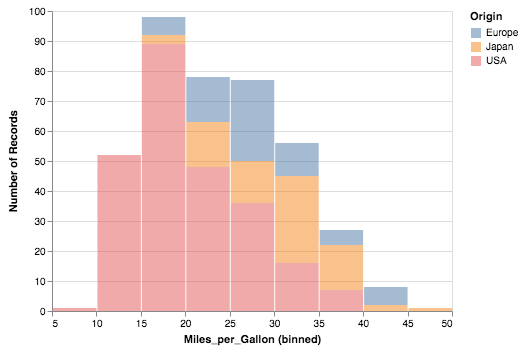

In [7]:
# Use the bin=True attribute to create histograms
# opacity -> alters the alpha of the bars


alt.Chart(cars).mark_bar(opacity=0.5).encode(
    alt.X('Miles_per_Gallon', bin=True),
    alt.Y('count()'),
    alt.Color('Origin')
)

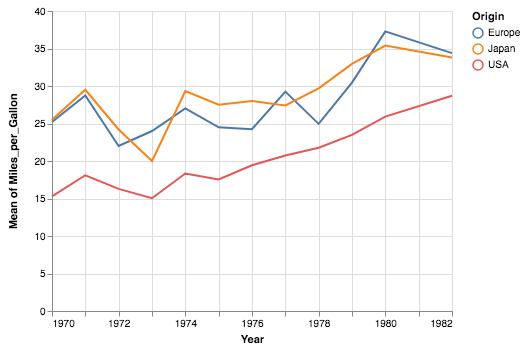

In [12]:
# Use aggregation on column to simplify the visual

alt.Chart(cars).mark_line().encode(
    x = 'Year:T',
    color = 'Origin',
    y = 'mean(Miles_per_Gallon)'
)

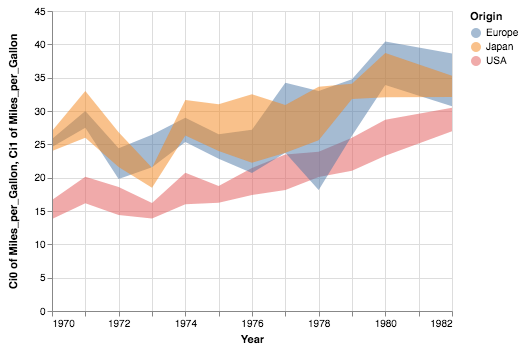

In [14]:
# Practice displaying the spread of the data using confidence intervals (i.e. upper and lower bounds) with area mark

alt.Chart(cars).mark_area(opacity=0.5).encode(
    x = 'Year:T',
    color = 'Origin',
    y = 'ci0(Miles_per_Gallon)',
    y2 = 'ci1(Miles_per_Gallon)',  
)

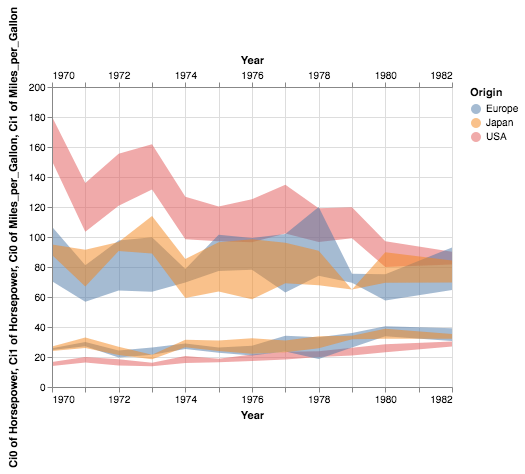

In [16]:
# Practice stacking two independent figures on the same plot

# -> Use '+' to combine the two figures
# -> .resolve_axis(x='independent')

(alt.Chart(cars).mark_area(opacity=0.5).encode(
    x = 'Year:T',
    color = 'Origin',
    y = 'ci0(Horsepower)',
    y2 = 'ci1(Horsepower)',  
) + alt.Chart(cars).mark_area(opacity=0.5).encode(
    x = 'Year:T',
    color = 'Origin',
    y = 'ci0(Miles_per_Gallon)',
    y2 = 'ci1(Miles_per_Gallon)',  
)).resolve_axis(x='independent')

#### Time Binning

In [18]:
# Import data

temps = data.seattle_temps()
temps.head()

date  temp
0 2010-01-01 00:00:00  39.4
1 2010-01-01 01:00:00  39.2
2 2010-01-01 02:00:00  39.0
3 2010-01-01 03:00:00  38.9
4 2010-01-01 04:00:00  38.8

In [19]:
# Tip: When working with large data quantities use this

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [20]:
# Test to see temporary json file created

alt.Chart(temps).mark_line().to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'altair-data-724d6426c5eb0a15708f1ea6286b0a8d.json',
  'format': {'type': 'json'}},
 'mark': 'line',
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.6.0.json'}

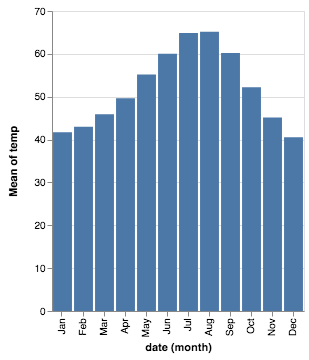

In [22]:
# Practice using timeUnit to work with dates

alt.Chart(temps).mark_bar().encode(
    x = alt.X('date:O', timeUnit='month'),
    y = 'mean(temp):Q'
)

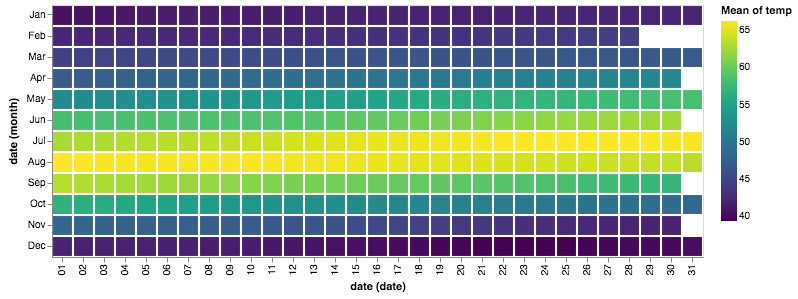

In [23]:
# Display a heatmap of temperatures

alt.Chart(temps).mark_rect().encode(
    x = alt.X('date:O', timeUnit='date'),
    y = alt.Y('date:O', timeUnit='month'),
    color = 'mean(temp):Q'
)

In [24]:
# Import pandas and numpy

import pandas as pd
import numpy as np

In [32]:
# Import KKR data

df = pd.read_csv('../data/harvest_time_report.csv')


In [34]:
# Drop columns
df.drop(columns=['Client', 'Project','Notes','Last Name','Roles'], inplace=True)
df.head()

Date Project Code             Task  Hours  Hours Rounded Billable?  \
0  2017-01-16          NaN          Meeting   1.00           1.00       Yes   
1  2017-01-16          NaN  Web Maintenance   1.17           1.25       Yes   
2  2017-01-16          NaN  Web Maintenance   0.33           0.25       Yes   
3  2017-01-16          NaN  Web Maintenance   0.33           0.25       Yes   
4  2017-01-16          NaN  Web Maintenance   0.33           0.25       Yes   

  Invoiced? Approved? First Name Employee? External Reference URL  
0        No       Yes      Keith        No                    NaN  
1        No       Yes      Keith        No                    NaN  
2        No       Yes      Keith        No                    NaN  
3        No       Yes      Keith        No                    NaN  
4        No       Yes      Keith        No                    NaN

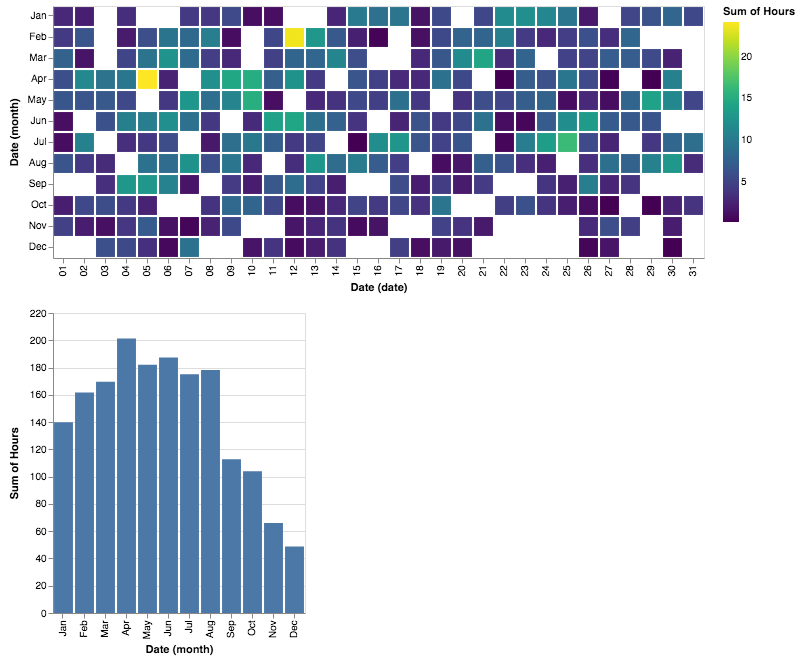

In [29]:
# Display a heatmap of temperatures

(alt.Chart(kkr_df).mark_rect().encode(
    x = alt.X('Date:O', timeUnit='date'),
    y = alt.Y('Date:O', timeUnit='month'),
    color = 'sum(Hours):Q'
) & alt.Chart(kkr_df).mark_bar().encode(
    x = alt.X('Date:O', timeUnit='month'),
    y = 'sum(Hours):Q'
))

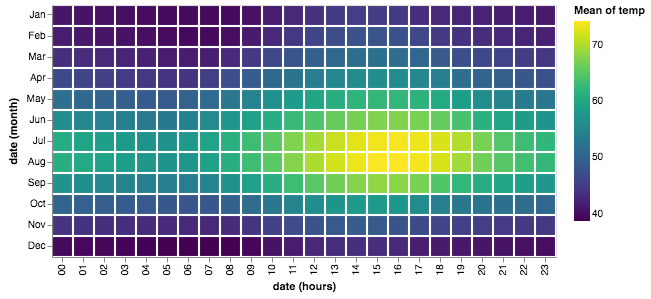

In [35]:
# Display a heatmap of temperatures 

# -> x is converted to hours

alt.Chart(temps).mark_rect().encode(
    x = alt.X('date:O', timeUnit='hours'),
    y = alt.Y('date:O', timeUnit='month'),
    color = 'mean(temp):Q'
)